In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv('/content/drive/MyDrive/파이썬코드/전력량예측/shikoku_electricity_2012.csv',
            skiprows=3, # 처음 3행은 읽지 않는다.
            names=['DATE','TIME','consumption'], # column의 이름 정하기 (csv에 있는 헤더는 사용하지 않음)
            parse_dates={'date_hour':['DATE','TIME']}, # 날짜 파싱 (DATE와 TIME열의 데이터를 합해 date_hour라 이름짓고 '날짜시간'형태로 취급함.
            index_col='date_hour') # 인덱스 column 정하기

In [12]:
data.head(10)

,consumption
date_hour,
2012-07-02 00:00:00,261
2012-07-02 01:00:00,256
2012-07-02 02:00:00,269
2012-07-02 03:00:00,289
2012-07-02 04:00:00,297
2012-07-02 05:00:00,289
2012-07-02 06:00:00,282
2012-07-02 07:00:00,297
2012-07-02 08:00:00,344


아래는 모든 전력 소비량 데이터를 DataFrame 하나로 정리하는 코드

In [14]:
ed=[]
for year in [2012, 2013, 2014, 2015, 2016]:
  ed=ed+[pd.read_csv(
    '/content/drive/MyDrive/파이썬코드/전력량예측/shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')] # index_col: 지정한 column을 행 데이터의 index로 함
# 데이터를 이어붙임, pd.concat()
# 행을 붙이는 것 axis=0 (default)
# 열을 붙이는 것 axis=1
elec_data = pd.concat(ed)

In [15]:
elec_data
#2012~2016 까지의 데이터를 하나의 데이터 프레임으로(행방향) 합쳐진 형태 

,consumption
date_hour,
2012-07-02 00:00:00,261
2012-07-02 01:00:00,256
2012-07-02 02:00:00,269
2012-07-02 03:00:00,289
2012-07-02 04:00:00,297
...,...
2016-03-31 19:00:00,329
2016-03-31 20:00:00,317
2016-03-31 21:00:00,298


데이터 시각화

In [16]:
import matplotlib.pyplot as plt

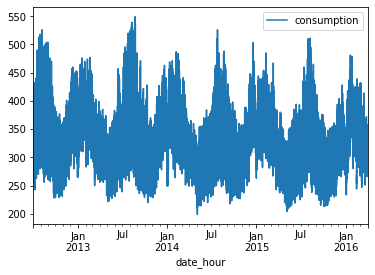

In [17]:
elec_data.plot()

In [18]:
# 시계열 그래프 생성
delta = elec_data.index - pd.to_datetime('2012/07/01 00:00:00') 
#2012년 7월 1일 0시를 기준으로 1이 하루일 때 얼마나 떨어져 있는가, time일 만큼 기준점에서 떨어져 있다
elec_data['time'] = delta.days + delta.seconds / 3600.0 / 24.0

In [20]:
pd.to_datetime('2012/07/01 00:00:00')

Timestamp('2012-07-01 00:00:00')

In [21]:
elec_data.head(10)

,consumption,time
date_hour,,
2012-07-02 00:00:00,261,1.000000
2012-07-02 01:00:00,256,1.041667
2012-07-02 02:00:00,269,1.083333
2012-07-02 03:00:00,289,1.125000
2012-07-02 04:00:00,297,1.166667
2012-07-02 05:00:00,289,1.208333
2012-07-02 06:00:00,282,1.250000
2012-07-02 07:00:00,297,1.291667
2012-07-02 08:00:00,344,1.333333


In [22]:
elec_data.index

DatetimeIndex(['2012-07-02 00:00:00', '2012-07-02 01:00:00',
               '2012-07-02 02:00:00', '2012-07-02 03:00:00',
               '2012-07-02 04:00:00', '2012-07-02 05:00:00',
               '2012-07-02 06:00:00', '2012-07-02 07:00:00',
               '2012-07-02 08:00:00', '2012-07-02 09:00:00',
               ...
               '2016-03-31 14:00:00', '2016-03-31 15:00:00',
               '2016-03-31 16:00:00', '2016-03-31 17:00:00',
               '2016-03-31 18:00:00', '2016-03-31 19:00:00',
               '2016-03-31 20:00:00', '2016-03-31 21:00:00',
               '2016-03-31 22:00:00', '2016-03-31 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=32856, freq=None)

Text(0, 0.5, 'electricity consumption(*10000 kWh)')

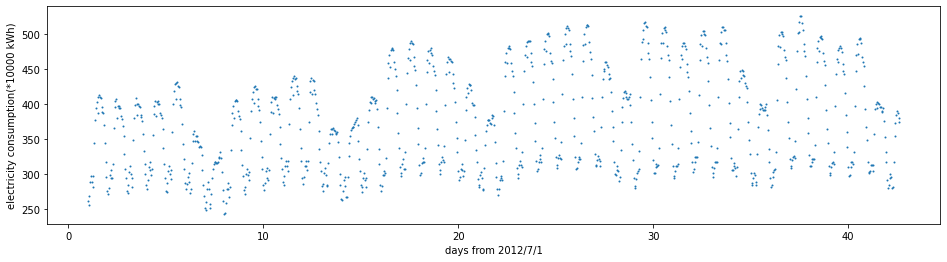

In [23]:
plt.figure(figsize=(16,4))
plt.scatter(elec_data[:1000]['time'], elec_data[:1000]['consumption'], s=1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('electricity consumption(*10000 kWh)')

Text(0, 0.5, 'electricity consumption(*10000 kWh)')

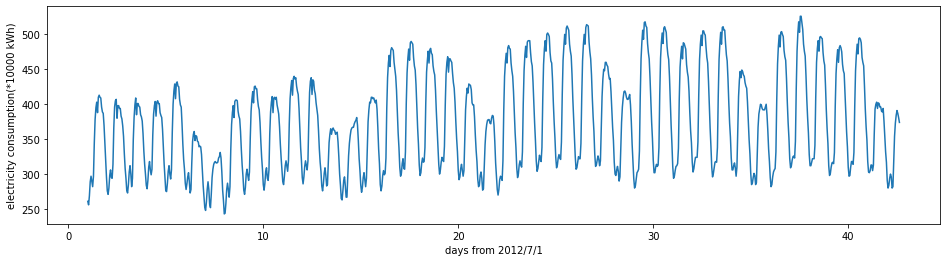

In [24]:
plt.figure(figsize=(16,4))
plt.plot(elec_data[:1000]['time'], elec_data[:1000]['consumption'])
plt.xlabel('days from 2012/7/1')
plt.ylabel('electricity consumption(*10000 kWh)')

대략 180일마다 전력소비량 peak가 관찰됨 (여름, 겨울)
여름이 겨울보다 peak가 조금 더 높음

히스토그램 그려보기

Text(0, 0.5, 'count')

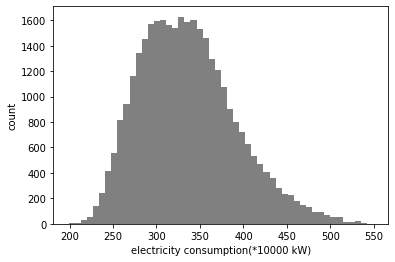

In [25]:
# 히스토그램 생성
plt.hist(elec_data['consumption'], bins=50, color="gray")
plt.xlabel('electricity consumption(*10000 kW)')
plt.ylabel('count')